In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the dataset
data_path = "./dataset/processed/train.csv"
df = pd.read_csv(data_path, dtype={"id": str})

# Preprocess the dataset
df['comment_text'] = df['comment_text'].astype(str)
df['score'] = df['score'].astype(int)

(array([0.71715087, 0.01109306, 0.12706569, 0.03249315, 0.03182319,
        0.02342576, 0.01927362, 0.01393785, 0.0133916 , 0.01034521]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

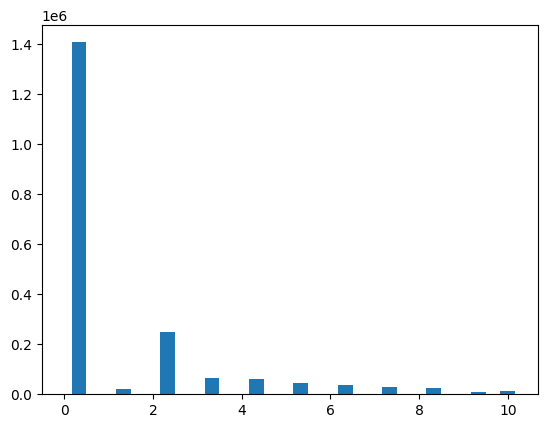

In [3]:
score = df["score"]
plt.hist(score, bins = 30, align = 'right')
weights = np.ones_like(score)/len(score)
plt.hist(score, weights=weights)

In [4]:
not_toxic = df.loc[df["score"] == 0]
level_2_toxic = df.loc[df["score"] == 2]
level_1_toxic = df.loc[df["score"] == 1]
higher_than_2_toxic = df.loc[df["score"] > 2]
nine_and_ten = df.loc[df["score"] >= 9]

In [5]:
df = pd.concat([not_toxic.sample(60_000, random_state=53), level_2_toxic.sample(65_000, random_state=53), level_1_toxic, higher_than_2_toxic, ni])

In [6]:
df['target'] = np.nan

# Assign 0 to 'target' for non-toxic scores
df.loc[df['score'] < 4, 'target'] = 0

# Assign 1 to 'target' for toxic scores
df.loc[df['score'] >= 4, 'target'] = 1

# Split the DataFrame into not_toxic_at_all and toxic
not_toxic_at_all = df.loc[df['target'] == 0]
toxic = df.loc[df['target'] == 1]

df = pd.concat([not_toxic_at_all, toxic])

In [7]:
# shuffle data
df.sample(frac=1)

,Unnamed: 0,id,comment_text,score,target
637755,637756,1022135,"i hope the ""god"" james believes in does not ne...",4,1.0
1515212,1515215,5975571,how convenient that gardner has forgotten that...,2,0.0
87595,87595,349677,"good points made, but they will fall on deaf e...",5,1.0
961017,961018,5293958,here is the problem - we are now creating a cu...,1,0.0
1549210,1549213,6018043,how do you live in such a negative head..........,4,1.0
...,...,...,...,...,...
1414947,1414949,5848426,"i nominate wiliki for the. """"pinocchio"" award.",4,1.0
1692436,1692439,6197222,muslim women an easy political target?\n\ninn...,6,1.0
1635979,1635982,6126526,"why is this news, who the heck cares what he t...",3,0.0
1684406,1684409,6186928,the most dangerous place to be in hawaii is st...,4,1.0


(array([0.48866368, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.51133632]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

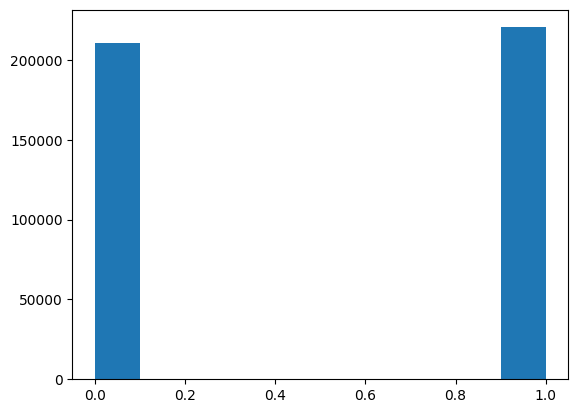

In [29]:
target = df["target"]
plt.hist(target)
weights = np.ones_like(target)/len(target)
plt.hist(target, weights=weights)

In [27]:
tmp = df.loc[df["target"] == 0]
tmp.shape

(210616, 5)

In [25]:
df["target"].unique()

array([0., 1.])

In [13]:
from sklearn.model_selection import train_test_split

In [10]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [11]:
train_df.shape

(344803, 5)